In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
event = pd.read_csv("../../data/introduction2DS/heart-disease.csv")

In [3]:
event.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = event.target
x = event.drop('target', axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
# rf = RandomForestClassifier(n_estimators = 15, max_depth = 5)
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

<AxesSubplot:>

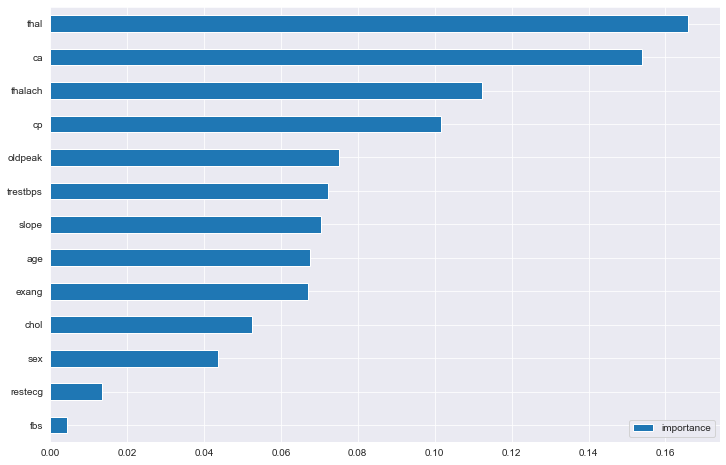

In [15]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))